In [23]:
import pandas as pd


country = 'England'
competition_name = 'PremierLeague'
seasons = '2017-2023'


df = pd.read_csv(f'/home/joe/IPython/Statistico/Preprocessed/Data/{country}/{competition_name}/{seasons}-ratings-processed.csv')


df = df[df['round'] > 6]


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 60 to 2279
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1920 non-null   int64  
 1   season_id             1920 non-null   int64  
 2   round                 1920 non-null   int64  
 3   date                  1920 non-null   int64  
 4   home_team             1920 non-null   object 
 5   home_goals            1920 non-null   int64  
 6   home_league_position  1920 non-null   int64  
 7   home_attack_total     1920 non-null   float64
 8   home_defence_total    1920 non-null   float64
 9   home_attack_rank      1920 non-null   float64
 10  home_defence_rank     1920 non-null   float64
 11  away_team             1920 non-null   object 
 12  away_goals            1920 non-null   int64  
 13  away_league_position  1920 non-null   int64  
 14  away_attack_total     1920 non-null   float64
 15  away_defence_total    192

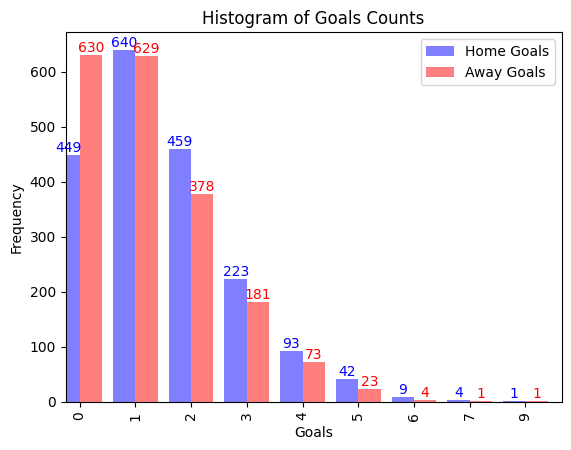

+-------+------------------+---------------------------+------------------+---------------------------+
| Goals | Home Goals Count | Home Goals Percentage (%) | Away Goals Count | Away Goals Percentage (%) |
+-------+------------------+---------------------------+------------------+---------------------------+
|   0   |              449 |                     23.39 |              630 | 32.81                     |
|   1   |              640 |                     33.33 |              629 | 32.76                     |
|   2   |              459 |                     23.91 |              378 | 19.69                     |
|   3   |              223 |                     11.61 |              181 | 9.43                      |
|   4   |               93 |                      4.84 |               73 | 3.8                       |
|   5   |               42 |                      2.19 |               23 | 1.2                       |
|   6   |                9 |                      0.47 |        

In [24]:
import matplotlib.pyplot as plt
from tabulate import tabulate


def print_goal_count_chart(df, home=True, away=True):
    fig, ax = plt.subplots()
    home_goals_counts = df['home_goals'].value_counts().sort_index()
    away_goals_counts = df['away_goals'].value_counts().sort_index()
    
    all_goal_counts = pd.concat([home_goals_counts, away_goals_counts], axis=1).fillna(0)
    all_goal_counts.columns = ['home_goals', 'away_goals']

    if home:
        home_bars = all_goal_counts['home_goals'].plot(kind='bar', color='blue', alpha=0.5, ax=ax, position=1, width=0.4, label='Home Goals')

        # Annotate the home bars with counts
        for i, (index, value) in enumerate(all_goal_counts['home_goals'].items()):
            ax.text(i - 0.2, value + 0.1, int(value), ha='center', va='bottom', color='blue')

    if away:
        away_bars = all_goal_counts['away_goals'].plot(kind='bar', color='red', alpha=0.5, ax=ax, position=0, width=0.4, label='Away Goals')

        # Annotate the away bars with counts
        for i, (index, value) in enumerate(all_goal_counts['away_goals'].items()):
            ax.text(i + 0.2, value + 0.1, int(value), ha='center', va='bottom', color='red')
    
    ax.set_xlabel('Goals')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of Goals Counts')
    ax.legend()

    plt.show()


def print_goal_counts(df, total):
    df = df.copy()
    df['total_goals'] = df['home_goals'] + df['away_goals']
    
    both = df[(df['home_goals'] > 0) & (df['away_goals'] > 0)]
    both_count = len(both)
    both_percentage = round(both_count / len(df), 2)

    total_percentage = round(len(df) / total, 2)
    
    total_1 = df[df['total_goals'] > 1]
    total_1_count = len(total_1)
    total_1_percentage = round(total_1_count / len(df), 2)
    
    total_2 = df[df['total_goals'] > 2]
    total_2_count = len(total_2)
    total_2_percentage = round(total_2_count / len(df), 2)
    
    total_3 = df[df['total_goals'] > 3]
    total_3_count = len(total_3)
    total_3_percentage = round(total_3_count / len(df), 2)
    
    home_wins = df[df['home_goals'] > df['away_goals']]
    home_wins_count = len(home_wins)
    home_wins_percentage = round(home_wins_count / len(df), 2)
    
    away_wins = df[df['home_goals'] < df['away_goals']]
    away_wins_count = len(away_wins)
    away_wins_percentage = round(away_wins_count / len(df), 2)
    
    draws = df[df['home_goals'] == df['away_goals']]
    draws_count = len(draws)
    draws_percentage = round(draws_count / len(df), 2)
    
    table = [
        ['Total Games', len(df), f'{total_percentage * 100}%'],
        ['Both teams scored', both_count, f'{round(both_percentage * 100, 2)}%'],
        ['Over 1 goal', total_1_count, f'{round(total_1_percentage * 100, 2)}%'],
        ['Over 2 goals', total_2_count, f'{round(total_2_percentage * 100, 2)}%'],
        ['Over 3 goals', total_3_count, f'{round(total_3_percentage  * 100, 2)}%'],
        ['Home wins', home_wins_count, f'{round(home_wins_percentage * 100, 2)}%'],
        ['Away wins', away_wins_count, f'{round(away_wins_percentage * 100, 2)}%'],
        ['Draws', draws_count, f'{round(draws_percentage * 100, 2)}%']
    ]
    
    print(tabulate(table, headers=['Category', 'Count', 'Percentage'], tablefmt='pretty', colalign=("left", "center", "center")))


def print_goal_count_table(df, home=True, away=True):
    home_goals_counts = pd.Series(dtype=int)
    total_home_goals = 0
    home_goals_percent = pd.Series(dtype=float)
    away_goals_counts = pd.Series(dtype=int)
    total_away_goals = 0
    away_goals_percent = pd.Series(dtype=float)
    
    if home:
        home_goals_counts = df['home_goals'].value_counts().sort_index()
        total_home_goals = home_goals_counts.sum()
        home_goals_percent = (home_goals_counts / total_home_goals) * 100

    if away:
        away_goals_counts = df['away_goals'].value_counts().sort_index()
        total_away_goals = away_goals_counts.sum()
        away_goals_percent = (away_goals_counts / total_away_goals) * 100
    
    counts_df = pd.DataFrame({
        'Home Goals Count': home_goals_counts,
        'Home Goals Percentage (%)': round(home_goals_percent, 2),
        'Away Goals Count': away_goals_counts,
        'Away Goals Percentage (%)': round(away_goals_percent, 2)
    }).fillna(0)  # Fill NaN values with 0 for cases where goals might not exist in one of the columns
    
    # Format the counts to have no decimal places
    counts_df['Home Goals Count'] = counts_df['Home Goals Count'].map('{:.0f}'.format)
    counts_df['Away Goals Count'] = counts_df['Away Goals Count'].map('{:.0f}'.format)
    
    # Convert DataFrame to a list of lists for tabulate
    table = counts_df.reset_index().rename(columns={'index': 'Goals'}).values.tolist()
    
    # Display the table using tabulate
    print(tabulate(table, headers=['Goals', 'Home Goals Count', 'Home Goals Percentage (%)', 'Away Goals Count', 'Away Goals Percentage (%)'], tablefmt='pretty', colalign=("center", "right", "right", "right", "left")))



print_goal_count_chart(df, True, True)
print_goal_count_table(df, True, True)
print_goal_counts(df, len(df))

#### Build a function that prints out information for a filtered data set

In [25]:
def print_filtered_opposition_data(df, main_column, opp_column, main_rank, diff):
    filtered_df = df[df[main_column] <= main_rank]
    filtered_df = filtered_df[filtered_df[opp_column] >= (filtered_df[main_column] + diff)]

    # filtered_df = filtered_df[filtered_df['home_attack_rank'] <= 5]

    print_goal_count_chart(filtered_df, True, True)
    print_goal_count_table(filtered_df, True, True)
    print_goal_counts(filtered_df, len(df))

#### Reduce the dataframe to teams competing that are high HOME defense ratings and low AWAY attack ratings  

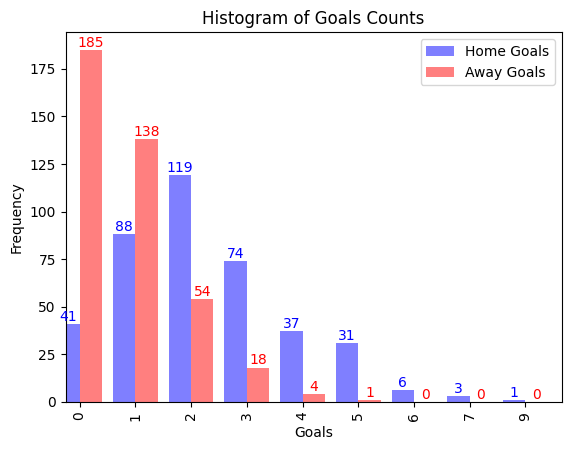

+-------+------------------+---------------------------+------------------+---------------------------+
| Goals | Home Goals Count | Home Goals Percentage (%) | Away Goals Count | Away Goals Percentage (%) |
+-------+------------------+---------------------------+------------------+---------------------------+
|   0   |               41 |                     10.25 |              185 | 46.25                     |
|   1   |               88 |                      22.0 |              138 | 34.5                      |
|   2   |              119 |                     29.75 |               54 | 13.5                      |
|   3   |               74 |                      18.5 |               18 | 4.5                       |
|   4   |               37 |                      9.25 |                4 | 1.0                       |
|   5   |               31 |                      7.75 |                1 | 0.25                      |
|   6   |                6 |                       1.5 |        

In [37]:
print_filtered_opposition_data(df, 'home_defence_rank', 'away_attack_rank', 6, 4)

#### Reduce the dataframe to teams competing that are high HOME attack ratings and low AWAY defence ratings  

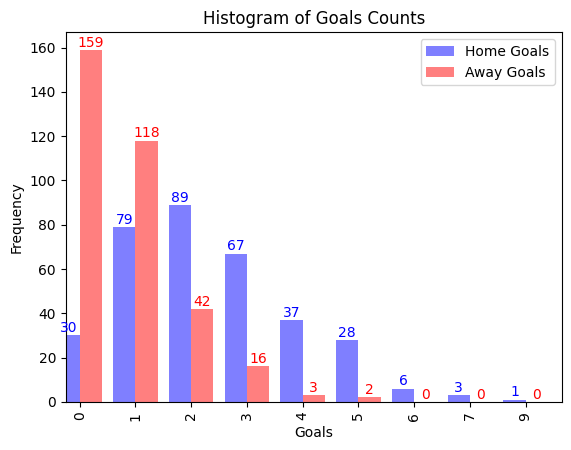

+-------+------------------+---------------------------+------------------+---------------------------+
| Goals | Home Goals Count | Home Goals Percentage (%) | Away Goals Count | Away Goals Percentage (%) |
+-------+------------------+---------------------------+------------------+---------------------------+
|   0   |               30 |                      8.82 |              159 | 46.76                     |
|   1   |               79 |                     23.24 |              118 | 34.71                     |
|   2   |               89 |                     26.18 |               42 | 12.35                     |
|   3   |               67 |                     19.71 |               16 | 4.71                      |
|   4   |               37 |                     10.88 |                3 | 0.88                      |
|   5   |               28 |                      8.24 |                2 | 0.59                      |
|   6   |                6 |                      1.76 |        

In [32]:
print_filtered_opposition_data(df, 'home_attack_rank', 'away_defence_rank', 6, 6)

#### Reduce the dataframe to teams competing that are high AWAY defense ratings and low HOME attack ratings  

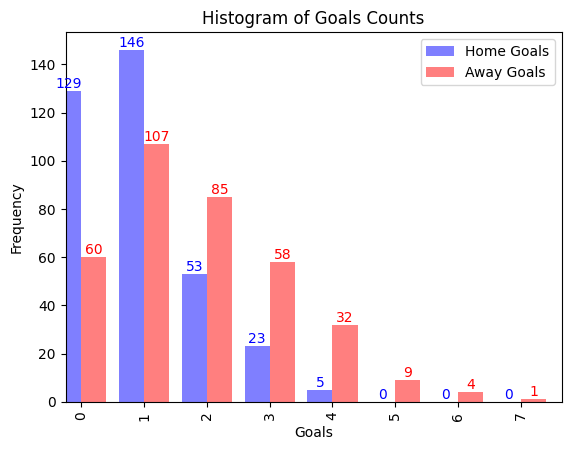

+-------+------------------+---------------------------+------------------+---------------------------+
| Goals | Home Goals Count | Home Goals Percentage (%) | Away Goals Count | Away Goals Percentage (%) |
+-------+------------------+---------------------------+------------------+---------------------------+
|   0   |              129 |                     36.24 |               60 | 16.85                     |
|   1   |              146 |                     41.01 |              107 | 30.06                     |
|   2   |               53 |                     14.89 |               85 | 23.88                     |
|   3   |               23 |                      6.46 |               58 | 16.29                     |
|   4   |                5 |                       1.4 |               32 | 8.99                      |
|   5   |                0 |                       0.0 |                9 | 2.53                      |
|   6   |                0 |                       0.0 |        

In [34]:
print_filtered_opposition_data(df, 'away_defence_rank', 'home_attack_rank', 6, 6)

#### Reduce the dataframe to teams competing that are high AWAY attack ratings and low HOME defence ratings

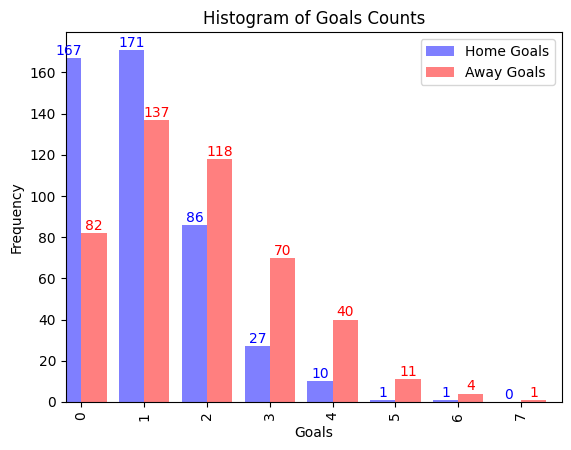

+-------+------------------+---------------------------+------------------+---------------------------+
| Goals | Home Goals Count | Home Goals Percentage (%) | Away Goals Count | Away Goals Percentage (%) |
+-------+------------------+---------------------------+------------------+---------------------------+
|   0   |              167 |                     36.07 |               82 | 17.71                     |
|   1   |              171 |                     36.93 |              137 | 29.59                     |
|   2   |               86 |                     18.57 |              118 | 25.49                     |
|   3   |               27 |                      5.83 |               70 | 15.12                     |
|   4   |               10 |                      2.16 |               40 | 8.64                      |
|   5   |                1 |                      0.22 |               11 | 2.38                      |
|   6   |                1 |                      0.22 |        

In [36]:
print_filtered_opposition_data(df, 'away_attack_rank', 'home_defence_rank', 6, 2)